     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=9826080c43fc67d4b17018e0a7305a50f3cffa3076fed04a16c98cd498134123
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
21.662991002786082


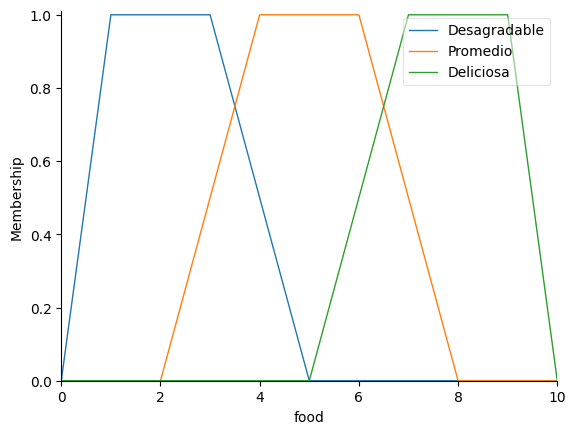

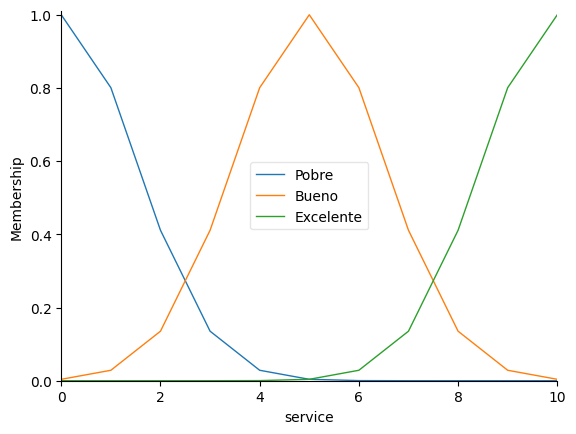

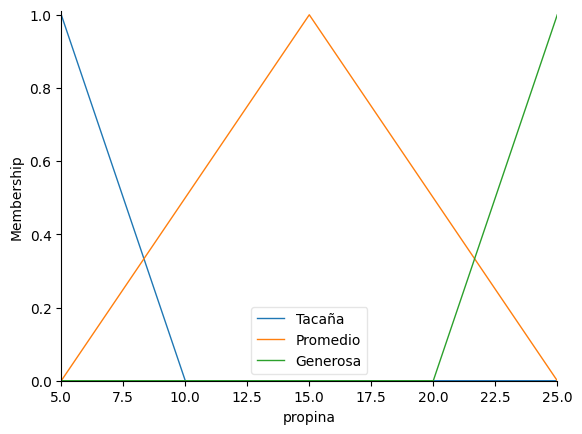

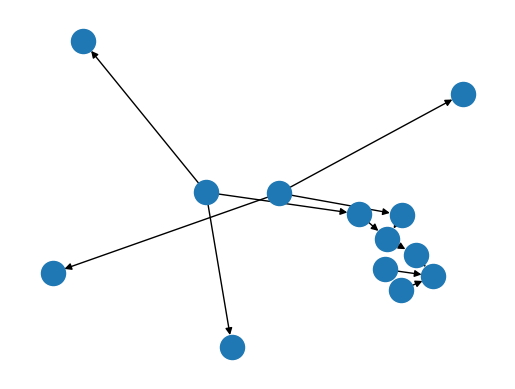

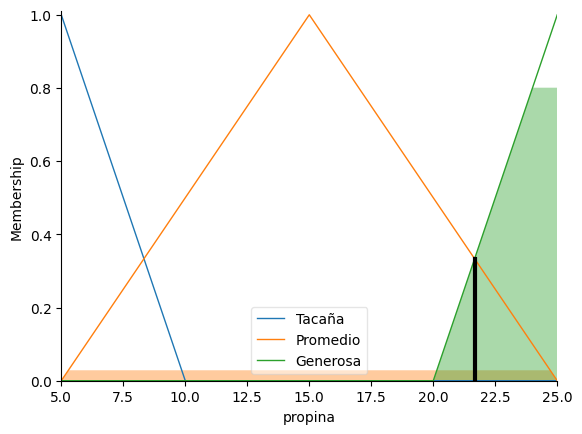

In [4]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
servicio = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(5, 26, 1), 'propina')

servicio['Pobre'] = fuzz.gaussmf(servicio.universe, 0, 1.5)
servicio['Bueno'] = fuzz.gaussmf(servicio.universe, 5, 1.5)
servicio['Excelente'] = fuzz.gaussmf(servicio.universe, 10, 1.5)

food['Desagradable'] = fuzz.trapmf(food.universe, [0, 1, 3, 5])
food['Promedio'] = fuzz.trapmf(food.universe, [2, 4,  6, 8])
food['Deliciosa'] = fuzz.trapmf(food.universe, [5, 7, 9, 10])

tip['Tacaña'] = fuzz.trimf(tip.universe, [0, 5, 10])
tip['Promedio'] = fuzz.trimf(tip.universe, [5, 15, 25])
tip['Generosa'] = fuzz.trimf(tip.universe, [20, 25, 30])


food.view()

servicio.view()

tip.view()

rule1 = ctrl.Rule(servicio['Pobre'] | food['Desagradable'], tip['Tacaña'])

rule2 = ctrl.Rule(servicio['Bueno'], tip['Promedio'])
rule3 = ctrl.Rule(servicio['Excelente'] | food['Deliciosa'], tip['Generosa'])

rule1.view()

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

"""""
tipping.input['food'] = 1
tipping.input['service'] = 1

tipping.input['food'] = 8
tipping.input['service'] = 3
"""""
tipping.input['food'] = 10
tipping.input['service'] = 9

tipping.compute()

print(tipping.output['propina'])
tip.view(sim=tipping)
